In [2]:
import kotext

from collections import Counter

import pickle

from matplotlib import font_manager, rc
from PIL import Image

font_location = 'C:/Windows/Fonts/malgun.ttf' # For Windows
font_name = font_manager.FontProperties(fname=font_location).get_name()
rc('font', family=font_name)

C:\Users\Dong\AppData\Local\Continuum\anaconda3\lib\site-packages\requests\__init__.py:80: RequestsDependencyWarning: urllib3 (1.22) or chardet (2.3.0) doesn't match a supported version!
  RequestsDependencyWarning)
C:\Users\Dong\AppData\Local\Continuum\anaconda3\lib\site-packages\gensim\utils.py:1209: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [3]:
paper_ls = ['%s-1.pdf'%i for i in range(140,162)] + ['%s-2.pdf'%i for i in range(140,162)]
paper_ls = ['Domestic/%s'%x for x in paper_ls]

# PDF to text (최초 1회만 실행)

In [15]:
text_ls = []

for x in paper_ls:
    try:
        text_ls.append(kotext.extract_text_from_pdf(x))
    except:  continue

In [16]:
with open('text_ls.pickle','wb') as f:
    pickle.dump(text_ls, f)

# Loading

In [17]:
with open('text_ls.pickle','rb') as f:
    text_ls = pickle.load(f)

# Preprocessing

In [71]:
remove_word_ls = ['연구소','연구원','연구','주택','금융','공사','한국','위원','시장','월간','동향', '\t\t', '경우','학과','교수',
                  '때문', '통해','으로','에서','하는','있다','대한','이다','위해','또한']
cleaned_ls = kotext.remove_words(remove_word_ls, text_ls)

In [35]:
nouns = kotext.extract_nouns(cleaned_ls)

C:\Users\Dong\AppData\Local\Continuum\anaconda3\lib\site-packages\konlpy\tag\_okt.py:16: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


총 단어 수 : 207672
중복을 제거한 단어의 수 : 6876


In [36]:
morphs = kotext.extract_morphs(cleaned_ls)

C:\Users\Dong\AppData\Local\Continuum\anaconda3\lib\site-packages\konlpy\tag\_okt.py:16: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


총 단어 수 : 299577
중복을 제거한 단어의 수 : 23014


In [37]:
counter = Counter(nouns)
counter.most_common(20)

[('대출', 1857),
 ('부동산', 1823),
 ('정책', 1724),
 ('분석', 1654),
 ('전망', 1540),
 ('연금', 1523),
 ('대리', 1416),
 ('보증', 1372),
 ('유동화', 1312),
 ('금리', 1245),
 ('채권', 1227),
 ('증권', 1146),
 ('가격', 1113),
 ('투자', 1086),
 ('자산', 1066),
 ('제도', 1063),
 ('가구', 1053),
 ('변화', 1007),
 ('관리', 971),
 ('방안', 963)]

In [38]:
counter = Counter(morphs)
counter.most_common(20)

[('부동산', 1858),
 ('대출', 1857),
 ('정책', 1724),
 ('분석', 1654),
 ('전망', 1540),
 ('연금', 1523),
 ('대리', 1416),
 ('보증', 1372),
 ('유동화', 1312),
 ('금리', 1275),
 ('채권', 1227),
 ('증권', 1146),
 ('가격', 1113),
 ('투자', 1086),
 ('자산', 1066),
 ('제도', 1063),
 ('가구', 1053),
 ('미국', 1044),
 ('변화', 1007),
 ('하고', 977)]

# WordCloud

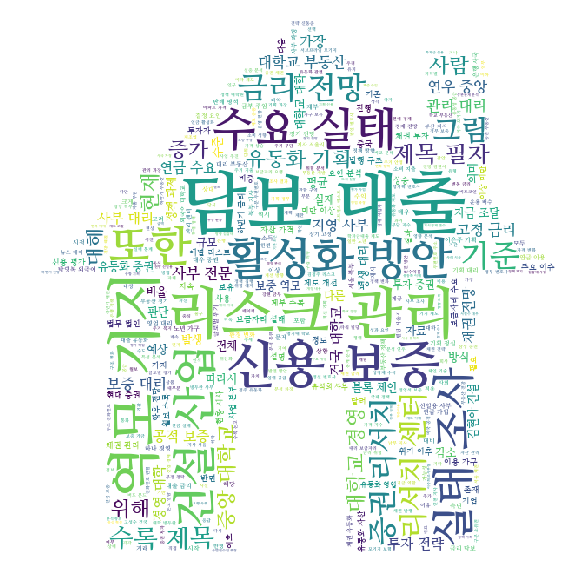

In [39]:
kotext.make_word_cloud(nouns, figsize =(15,10) ,fontsize = 80, image_path = 'house2.jpg')

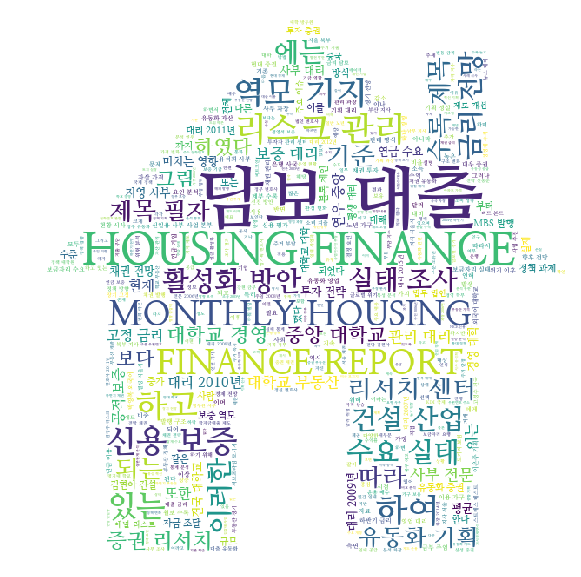

In [40]:
kotext.make_word_cloud(morphs,figsize =(15,10), fontsize = 80, image_path = 'house2.jpg')

# Embedding

In [121]:
sentences_noun_ls = kotext.preprocessing_for_embedding(cleaned_ls)

model,model_name = kotext.embedding(sentences_noun_ls, min_word_count=100, context = 5)

C:\Users\Dong\AppData\Local\Continuum\anaconda3\lib\site-packages\konlpy\tag\_okt.py:16: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


In [124]:
# 가장 유사한 단어 추출
model.wv.most_similar('정부', topn = 20)

C:\Users\Dong\AppData\Local\Continuum\anaconda3\lib\site-packages\gensim\matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int32 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('역할', 0.3437308371067047),
 ('지원', 0.327383816242218),
 ('이은주', 0.3204834461212158),
 ('문제', 0.29765525460243225),
 ('정책', 0.28895172476768494),
 ('책임', 0.2804998755455017),
 ('재정', 0.251360148191452),
 ('체계', 0.24853694438934326),
 ('최근', 0.24783602356910706),
 ('소고', 0.2442314475774765),
 ('크게', 0.22918269038200378),
 ('경기', 0.22870273888111115),
 ('규제', 0.2280672937631607),
 ('도시', 0.22709022462368011),
 ('행위', 0.22494317591190338),
 ('정영석', 0.21639373898506165),
 ('형성', 0.21266582608222961),
 ('완화', 0.2106752246618271),
 ('반영', 0.20788437128067017),
 ('진행', 0.2052067071199417)]

In [57]:
vocab = [x for x in model.wv.vocab]
print(len(vocab))

222


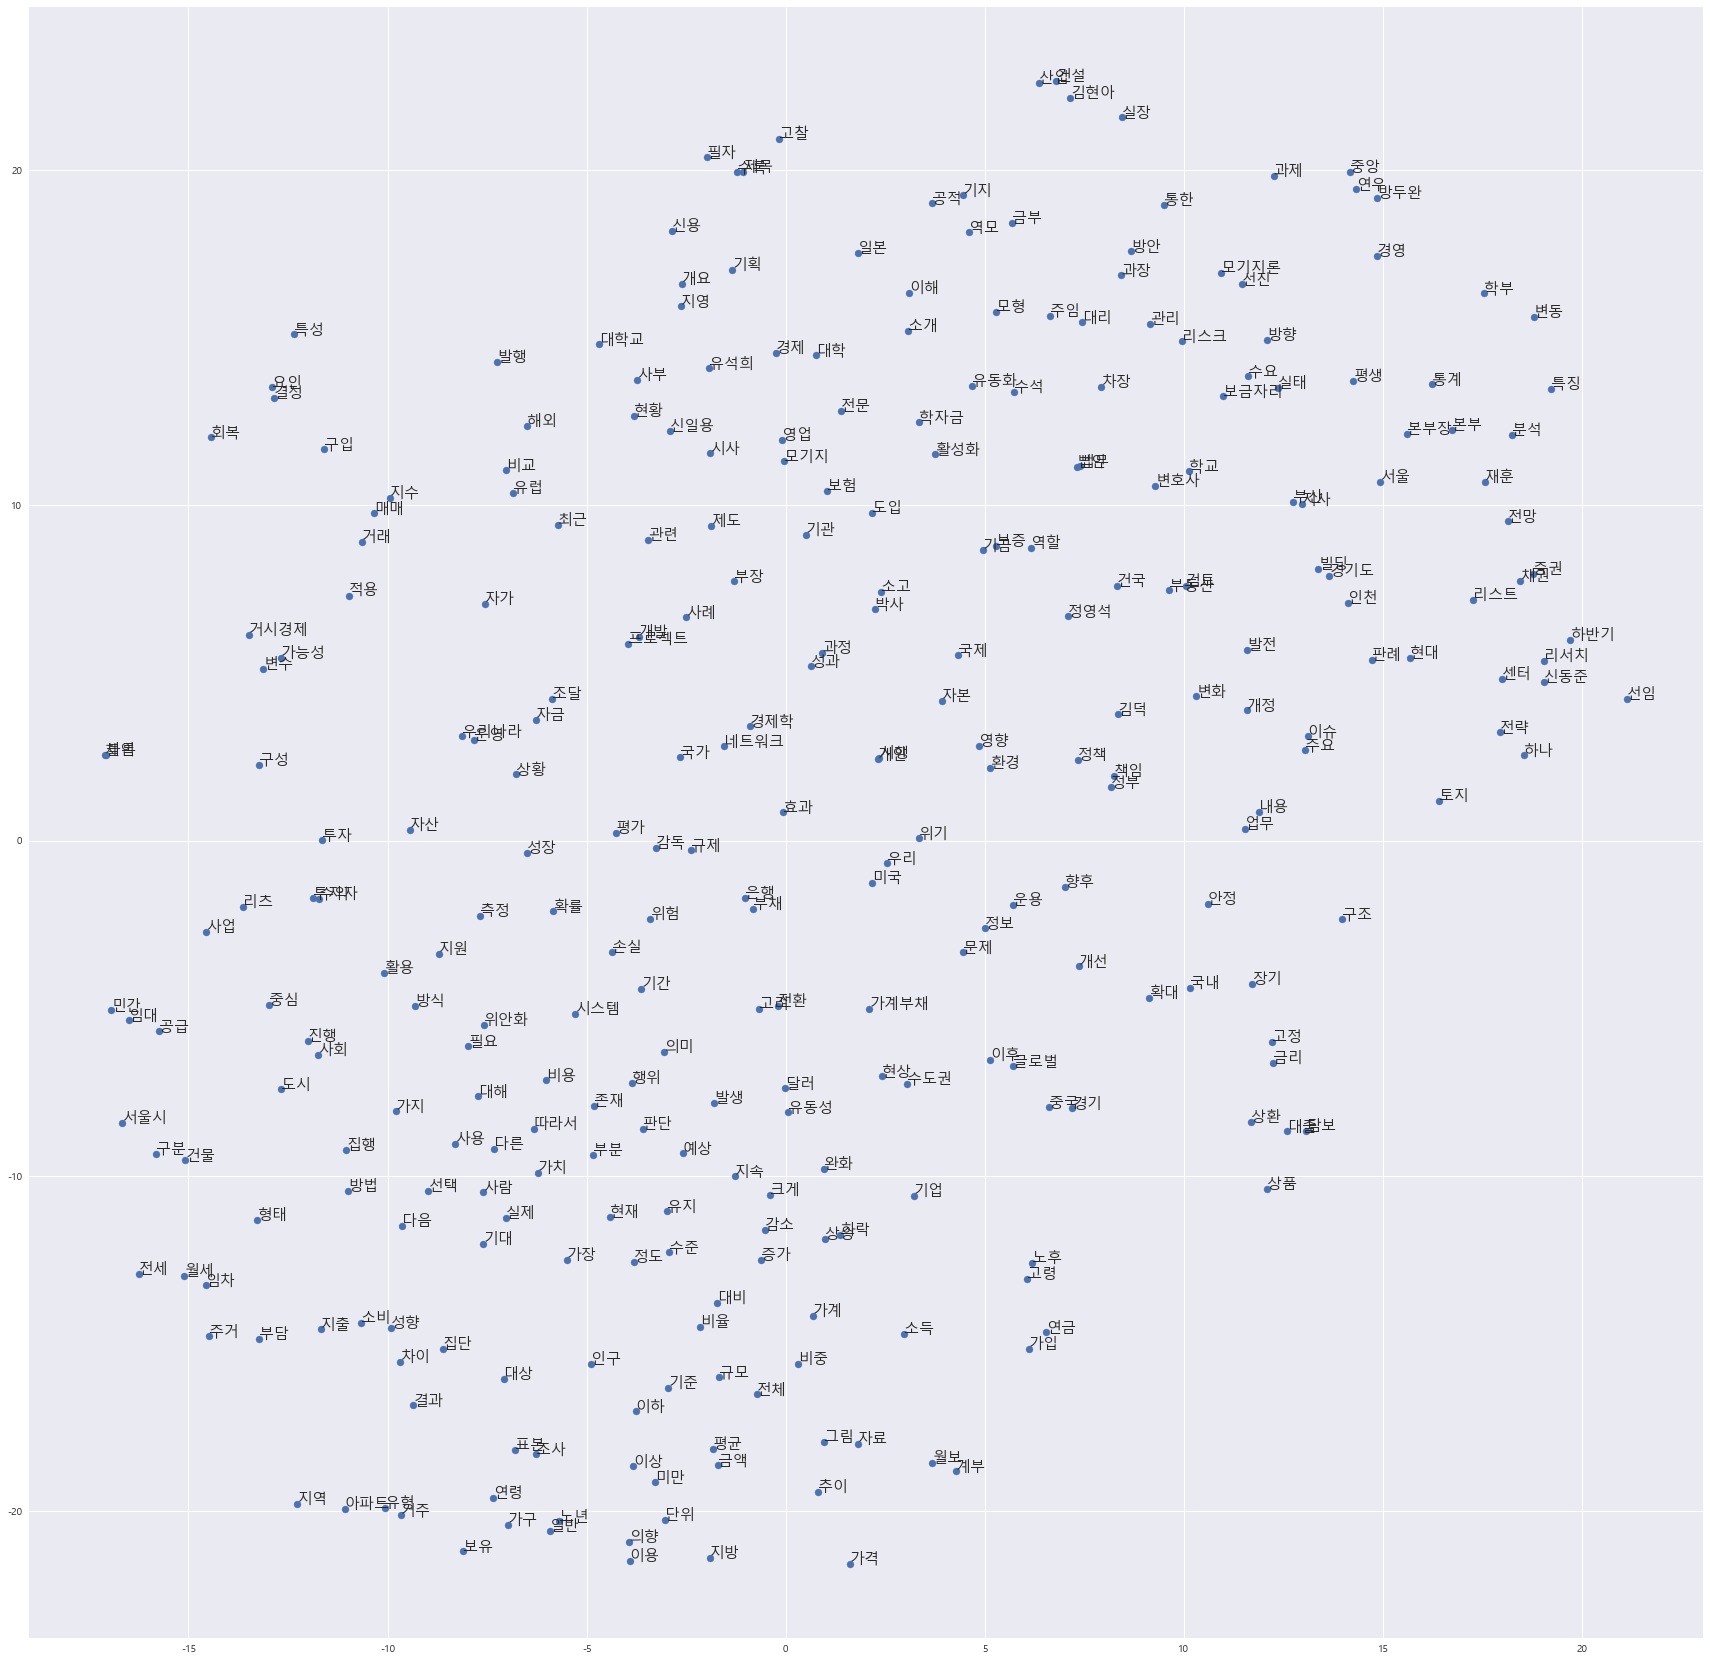

In [82]:
kotext.make_embedding_plot(model)

In [53]:
import io
import re
import pandas as pd
 
from pdfminer.converter import TextConverter
from pdfminer.pdfinterp import PDFPageInterpreter
from pdfminer.pdfinterp import PDFResourceManager
from pdfminer.pdfpage import PDFPage
 
from konlpy.tag import *
import konlpy
from gensim.models import word2vec
from collections import Counter

from wordcloud import WordCloud
import matplotlib.pyplot as plt
import numpy as np

from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import gensim
import matplotlib as mpl
import seaborn as sns
sns.set()
from matplotlib import font_manager, rc
from PIL import Image

font_location = 'C:/Windows/Fonts/malgun.ttf' # For Windows
font_name = font_manager.FontProperties(fname=font_location).get_name()
rc('font', family=font_name)

In [ ]:
word2vec.Word2Vec()